C:\Users\PC\AppData\Local\Temp\ipykernel_7448\3088539124.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby("age_group")[["Gender", "Signed_In", "Impressions", "Clicks"]].agg(


           Gender                   Signed_In              Impressions  \
            count      mean min max     count mean min max       count   
age_group                                                                
Invalid    137106  0.000000   0   0    137106  0.0   0   0      137106   
<18         13828  0.684842   0   1     13828  1.0   1   1       13828   
18-24       40694  0.533764   0   1     40694  1.0   1   1       40694   
25-34       58174  0.532162   0   1     58174  1.0   1   1       58174   
35-44       70860  0.531696   0   1     70860  1.0   1   1       70860   
45-54       64288  0.528979   0   1     64288  1.0   1   1       64288   
55-64       44738  0.536188   0   1     44738  1.0   1   1       44738   
65+         28753  0.363266   0   1     28753  1.0   1   1       28753   

                             Clicks                    
               mean min max   count      mean min max  
age_group                                              
Invalid    4.9996

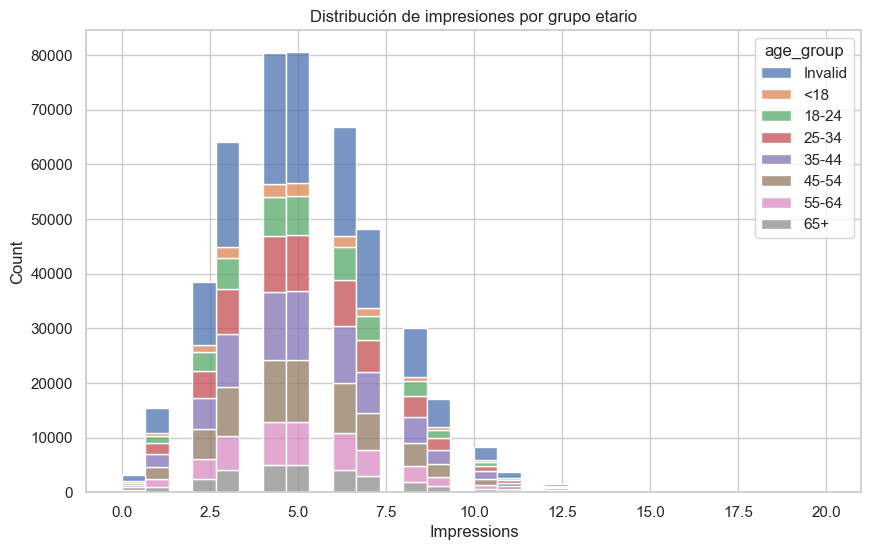

C:\Users\PC\AppData\Local\Temp\ipykernel_7448\3088539124.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="age_group", y="Impressions", palette="pastel")


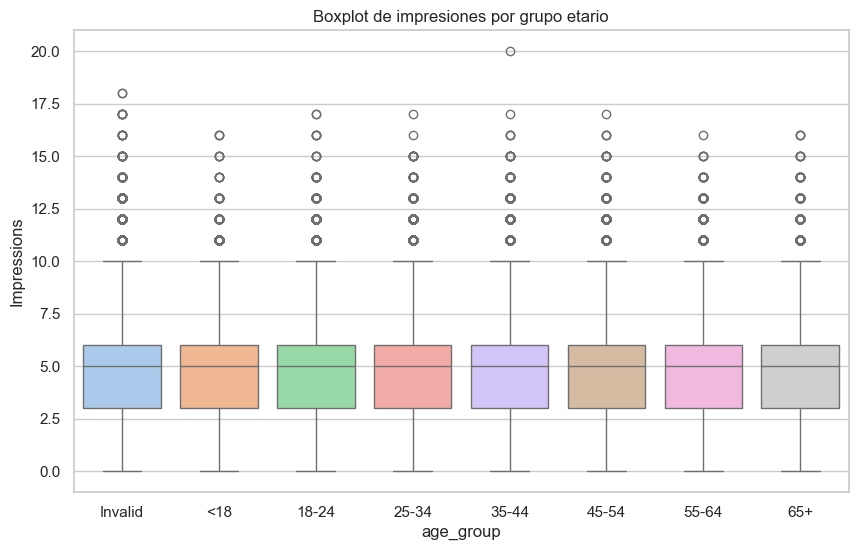

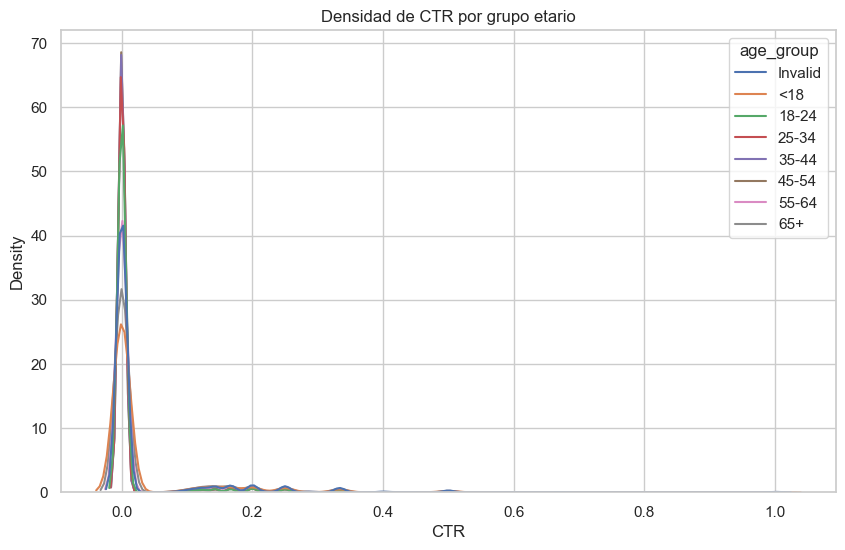

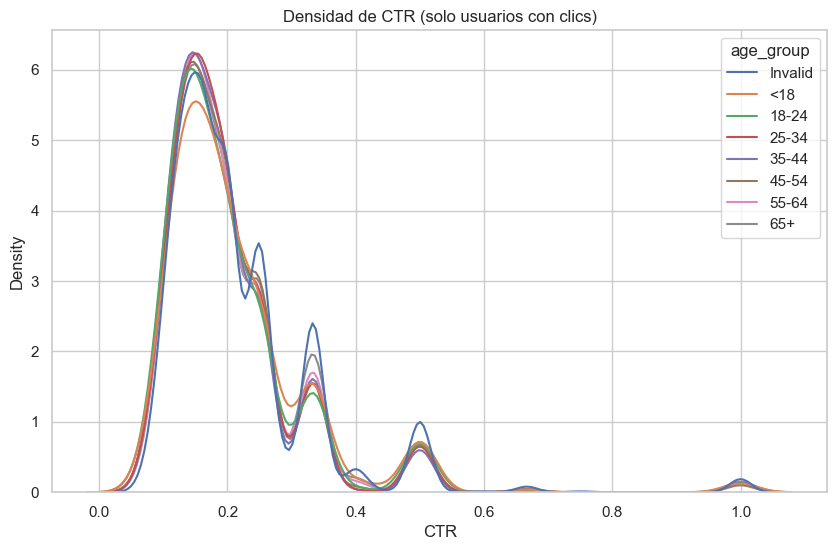

C:\Users\PC\AppData\Local\Temp\ipykernel_7448\3088539124.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["Clicks"] > 0], x="age_group", y="Clicks", palette="muted")


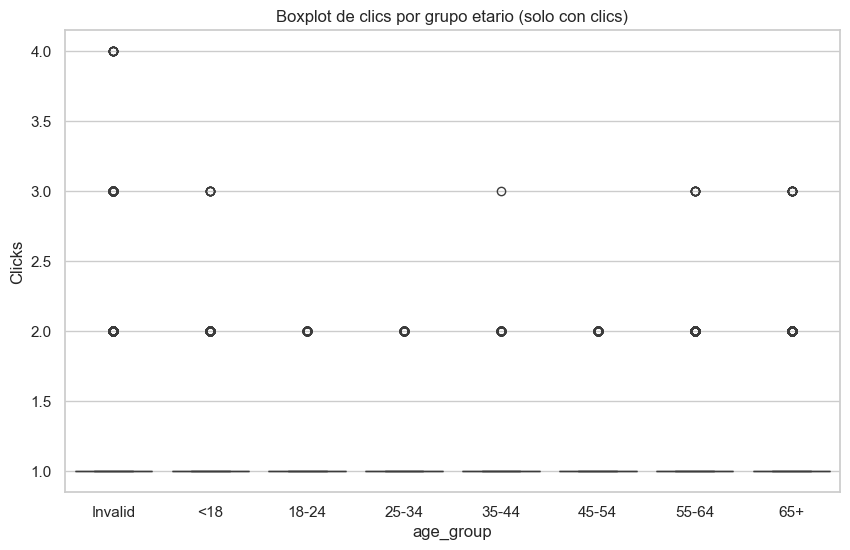

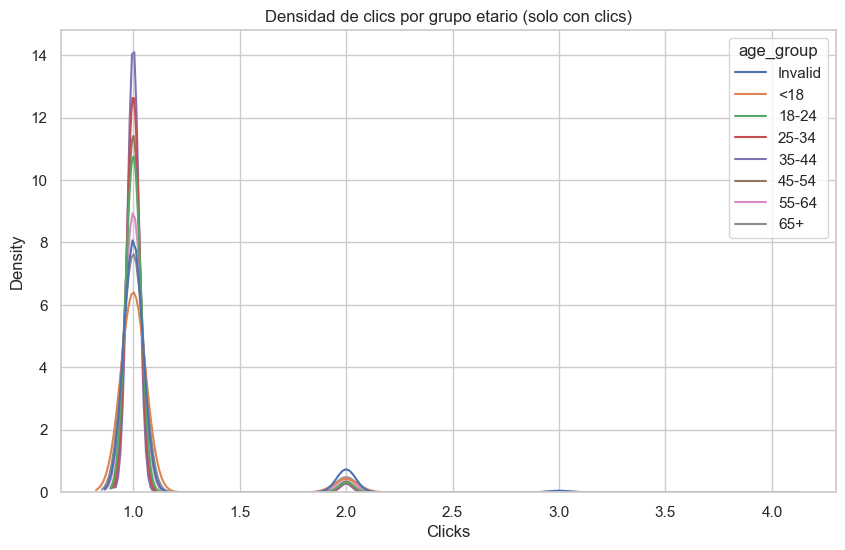

    scode  Gender age_group  count
0  Clicks       0   Invalid  17776
1  Clicks       0       <18    648
2  Clicks       0     18-24    977
3  Clicks       0     25-34   1361
4  Clicks       0     35-44   1675
5  Clicks       0     45-54   1494
6  Clicks       0     55-64   2006
7  Clicks       0       65+   2598
8  Clicks       1   Invalid      0
9  Clicks       1       <18   1285


C:\Users\PC\AppData\Local\Temp\ipykernel_7448\3088539124.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  etable = df.groupby(["scode", "Gender", "age_group"])["Impressions"].count().reset_index(name="count")


In [1]:
#Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 🎯 Configuración global de gráficos
sns.set(style="whitegrid")

# 📂 Establecer ruta relativa al proyecto
root = Path.cwd()  # Asegúrate de estar en la carpeta raíz del proyecto
csv_path = root.parent / "data" / "nyt1.csv"

# 📥 Leer los datos
df = pd.read_csv(csv_path)

# 🧠 Crear categorías de edad
bins = [-float("inf"), 0, 17, 24, 34, 44, 54, 64, float("inf")]
labels = ["Invalid", "<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["age_group"] = pd.cut(df["Age"], bins=bins, labels=labels)

# 📏 Estadísticas descriptivas por grupo etario
summary = df.groupby("age_group")[["Gender", "Signed_In", "Impressions", "Clicks"]].agg(
    ["count", "mean", "min", "max"]
)
print(summary)

# 💡 Crear CTR
df["CTR"] = df.apply(lambda row: row["Clicks"] / row["Impressions"] if row["Impressions"] > 0 else None, axis=1)

# 🧩 Categorizar comportamiento
def categorize(row):
    if row["Impressions"] == 0:
        return "NoImps"
    elif row["Clicks"] > 0:
        return "Clicks"
    else:
        return "Imps"

df["scode"] = df.apply(categorize, axis=1)
df["scode"] = df["scode"].astype("category")

# ============================
# 🎨 VISUALIZACIONES
# ============================

# 📊 Histograma de impresiones por grupo etario
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Impressions", hue="age_group", multiple="stack", bins=30)
plt.title("Distribución de impresiones por grupo etario")
plt.show()

# 📦 Boxplot de impresiones
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="age_group", y="Impressions", palette="pastel")
plt.title("Boxplot de impresiones por grupo etario")
plt.show()

# 📈 Densidad de CTR por grupo etario (usuarios con impresiones)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df["Impressions"] > 0], x="CTR", hue="age_group", common_norm=False)
plt.title("Densidad de CTR por grupo etario")
plt.show()

# 📈 Densidad de CTR (solo usuarios que hicieron clic)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df["Clicks"] > 0], x="CTR", hue="age_group", common_norm=False)
plt.title("Densidad de CTR (solo usuarios con clics)")
plt.show()

# 📦 Boxplot de clics
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df["Clicks"] > 0], x="age_group", y="Clicks", palette="muted")
plt.title("Boxplot de clics por grupo etario (solo con clics)")
plt.show()

# 📈 Densidad de clics
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df["Clicks"] > 0], x="Clicks", hue="age_group", common_norm=False)
plt.title("Densidad de clics por grupo etario (solo con clics)")
plt.show()

# 🧾 Tabla resumen de comportamiento por grupo
etable = df.groupby(["scode", "Gender", "age_group"])["Impressions"].count().reset_index(name="count")
print(etable.head(10))


# El grupo "Invalid" representa usuarios con Age <= 0.
# En muchos casos, esto se debe a usuarios no logueados o sin edad declarada.
# Se mantiene esta categoría para asegurar comparabilidad con el análisis realizado en R.